### This project focuses on analyzing patient health data, where we will use `KNN Classification` to predict the presence of heart disease (target) based on various medical attributes such as age, sex, cholesterol, blood pressure, and exercise-induced factors.

### Import required Libraries

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the `heart.csv` file using pandas

In [294]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**View the top 5 rows of the dataset**

In [295]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Check if there is any kind of null value present in our dataset or not**

In [296]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### Let's visualize the distribution of patients' ages using a histogram `histplot()`. This will help us understand how ages are spread across the dataset.

Text(0.5, 0, 'Age')

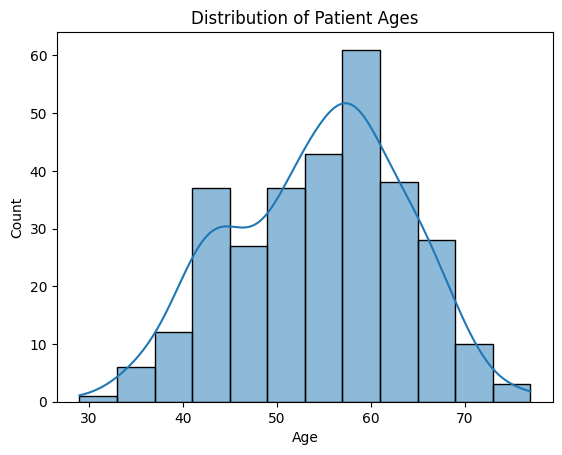

In [297]:
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')

### Let's plot a scatter plot of Age vs Cholesterol, with colors representing the presence of heart disease.
This helps us see patterns and relationships between age, cholesterol, and heart disease risk

Text(0.5, 1.0, 'Age vs Cholesterol')

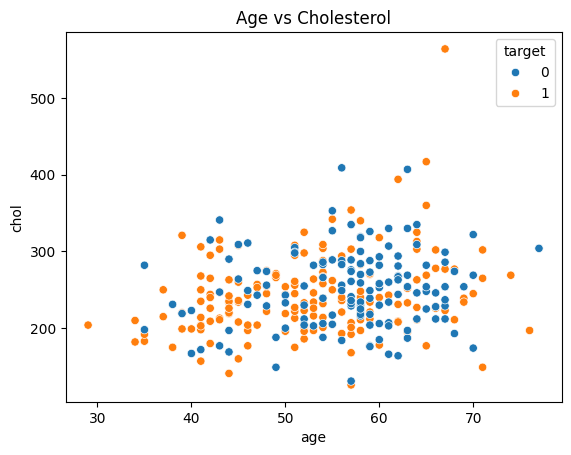

In [298]:
sns.scatterplot(data=df, x='age', y='chol', hue='target')
plt.title('Age vs Cholesterol')

### Correlation Heatmap of All Features in the Dataset
This heatmap helps us quickly identify which features are strongly related to each other and to the target, providing insights into potential risk factors for heart disease.


Text(0.5, 1.0, 'Correlation Heatmap')

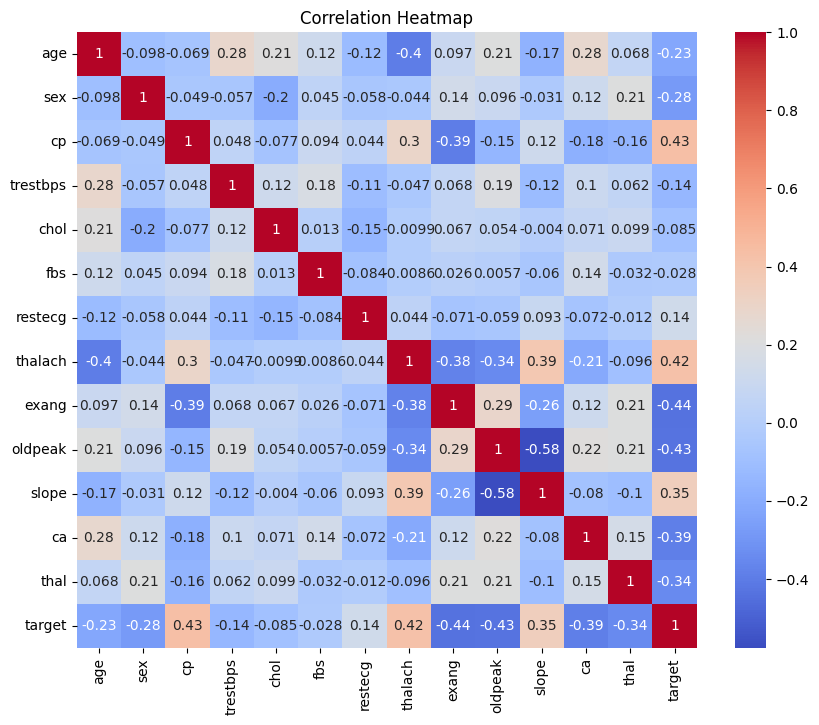

In [299]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

### Separating Features and Target
Here, `X` contains all the independent variables (features) by dropping the `target` column,        
while `y` contains the dependent variable (`target`) that we want to predict.


In [300]:
X = df.drop('target', axis=1)
y = df['target']

### Splitting the Dataset into Training and Testing Sets
We divide the data into training and testing sets using `train_test_split` from `sklearn.model_selection`.  
- `X_train` and `y_train` will be used to train the model.  
- `X_test` and `y_test` will be used to evaluate the model’s performance.  
Here, 33% of the data is reserved for testing, and `random_state=42` ensures reproducibility.


In [301]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### We have discussed that why Standardization is Needed
KNN relies on distances between data points. If the features are on different scales, some columns may dominate others. Standardizing the features ensures all columns contribute equally to the distance calculations.


In [302]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Creating the KNN Classifier
We are using KNN to predict heart disease. `k` tells the model how many neighbors to check. For now, we start with `k = 4` and will find the best value later.
.


In [303]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)


### Training the KNN Model
Here, we train the KNN classifier using the training data (`X_train` and `y_train`) so it can learn patterns to make predictions.


In [304]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### Making Predictions
We use the trained KNN model to predict the target values for the test data (`X_test`). The predictions are stored in `y_pred`.


In [305]:
y_pred = knn.predict(x_test)

### Model Evaluation
After training the model and making predictions, we evaluate its performance using the accuracy scor `(sklearn.metrics)`e to see how well it predicts heart disease.


In [306]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.86

### Finding the Best k Value
Here, we test different values of `k` from 1 to 15 to see which one gives the highest accuracy.  
For each `k`, we train the KNN model, make predictions on the test set, and store the accuracy in the `score` list.


In [307]:
from sklearn.metrics import accuracy_score
scores=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

### Visualizing Accuracy for Different k Values
We plot the accuracy scores for `k` values from 1 to 15.  
This helps us see which `k` gives the best performance for our KNN classifier.


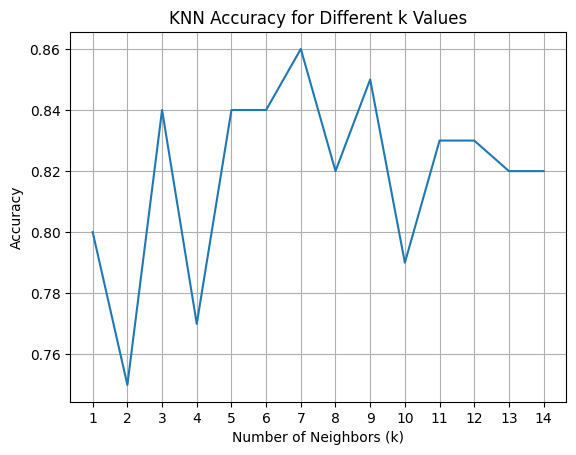

In [308]:
plt.plot(range(1,15),scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.xticks(range(1,15))
plt.grid(True)
plt.show()